In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("../datasets/main/store_item_demand.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [2]:
def add_time_features(df):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day_of_month'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek

    # cyclic encoding for Streamlit model
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    return df

def get_season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    else:
        return "Fall"

def add_season(df):
    df['season'] = df['month'].apply(get_season)
    return df


In [3]:
'''
year	Year extracted from the date (2013, 2014, etc.)
month	Month number (1–12)
day	Day of the month
dayofweek	Day of the week (Monday=0, Sunday=6)
month_sin	Sine encoding of month (captures seasonality)
month_cos	Cosine encoding of month (captures seasonality
'''

'\nyear\tYear extracted from the date (2013, 2014, etc.)\nmonth\tMonth number (1–12)\nday\tDay of the month\ndayofweek\tDay of the week (Monday=0, Sunday=6)\nmonth_sin\tSine encoding of month (captures seasonality)\nmonth_cos\tCosine encoding of month (captures seasonality\n'

In [3]:
df = add_time_features(df)
df = add_season(df)
df.head()


,date,store,item,sales,year,month,day_of_month,dayofweek,month_sin,month_cos,season
0,2013-01-01,1,1,13,2013,1,1,1,0.5,0.866025,Winter
1,2013-01-02,1,1,11,2013,1,2,2,0.5,0.866025,Winter
2,2013-01-03,1,1,14,2013,1,3,3,0.5,0.866025,Winter
3,2013-01-04,1,1,13,2013,1,4,4,0.5,0.866025,Winter
4,2013-01-05,1,1,10,2013,1,5,5,0.5,0.866025,Winter


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          913000 non-null  datetime64[ns]
 1   store         913000 non-null  int64         
 2   item          913000 non-null  int64         
 3   sales         913000 non-null  int64         
 4   year          913000 non-null  int32         
 5   month         913000 non-null  int32         
 6   day_of_month  913000 non-null  int32         
 7   dayofweek     913000 non-null  int32         
 8   month_sin     913000 non-null  float64       
 9   month_cos     913000 non-null  float64       
 10  season        913000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(4), int64(3), object(1)
memory usage: 62.7+ MB


,date,store,item,sales,year,month,day_of_month,dayofweek,month_sin,month_cos
count,913000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,9.130000e+05,9.130000e+05
mean,2015-07-02 11:59:59.999999744,5.500000,25.500000,52.250287,2015.000548,6.523549,15.727820,3.001643,-4.903879e-03,-2.097550e-03
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000,2013.000000,1.000000,1.000000,0.000000,-1.000000e+00,-1.000000e+00
25%,2014-04-02 00:00:00,3.000000,13.000000,30.000000,2014.000000,4.000000,8.000000,1.000000,-8.660254e-01,-8.660254e-01
50%,2015-07-02 12:00:00,5.500000,25.500000,47.000000,2015.000000,7.000000,16.000000,3.000000,-2.449294e-16,-1.836970e-16
75%,2016-10-01 00:00:00,8.000000,38.000000,70.000000,2016.000000,10.000000,23.000000,5.000000,5.000000e-01,8.660254e-01
max,2017-12-31 00:00:00,10.000000,50.000000,231.000000,2017.000000,12.000000,31.000000,6.000000,1.000000e+00,1.000000e+00
std,NaN,2.872283,14.430878,28.801144,1.414021,3.448535,8.799329,1.999316,7.057335e-01,7.084581e-01


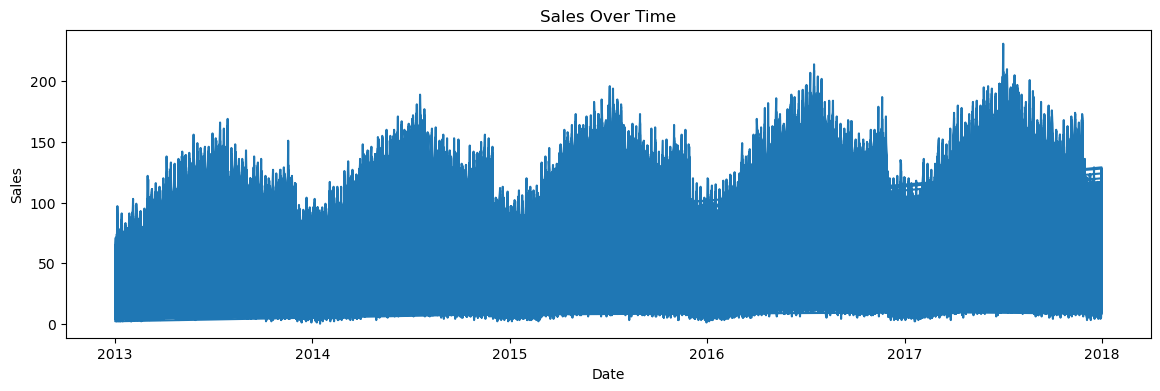

In [5]:
#Sales Over Time
plt.figure(figsize=(14,4))
plt.plot(df['date'], df['sales'])
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


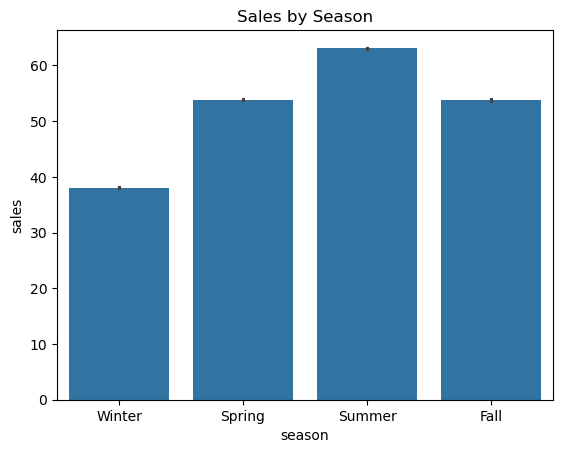

In [6]:
#Sales by Season
sns.barplot(x=df['season'], y=df['sales'])
plt.title("Sales by Season")
plt.show()


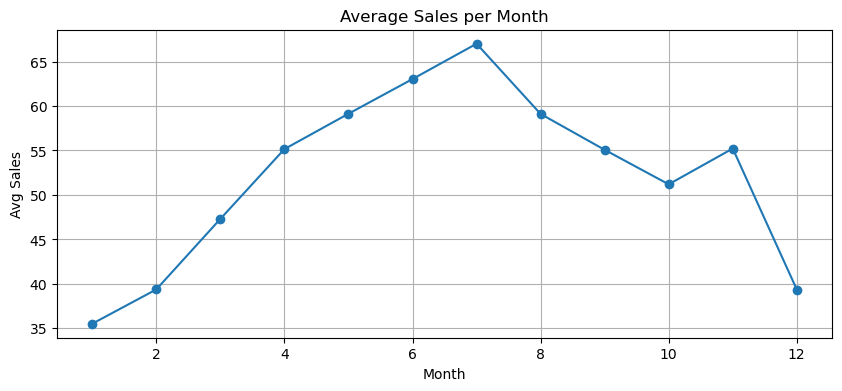

In [8]:
#Monthly Average Sales
monthly_avg = df.groupby("month")["sales"].mean()

plt.figure(figsize=(10,4))
plt.plot(monthly_avg, marker="o")
plt.title("Average Sales per Month")
plt.xlabel("Month")
plt.ylabel("Avg Sales")
plt.grid(True)
plt.show()


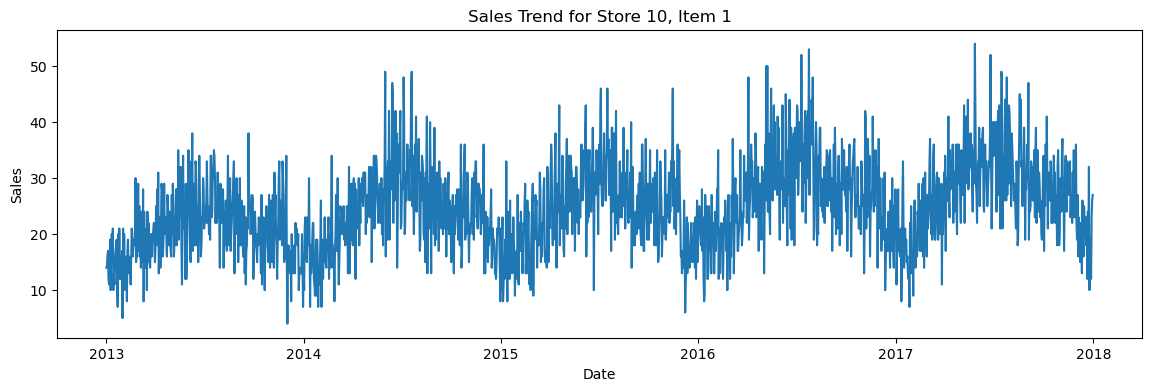

In [9]:
# Store-Item Example Trend
sample_store = 10
sample_item = 1

subset = df[(df['store'] == sample_store) & (df['item'] == sample_item)]

plt.figure(figsize=(14,4))
plt.plot(subset['date'], subset['sales'])
plt.title(f"Sales Trend for Store {sample_store}, Item {sample_item}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()
